## GPS Data

In [10]:
import requests, zipfile, io, gzip, glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [36]:
P734_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/P734_e.csv')
CABL_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/CABL_e.csv')
LWCK_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/LWCK_e.csv')
ONAB_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/ONAB_e.csv')

In [37]:
P734_e_filtered = P734_e[(P734_e['T'] > 2012) & (P734_e['T'] < 2014)]
CABL_e_filtered = CABL_e[(CABL_e['T'] > 2012) & (CABL_e['T'] < 2014)]
LWCK_e_filtered = LWCK_e[(LWCK_e['T'] > 2012) & (LWCK_e['T'] < 2014)]
ONAB_e_filtered = ONAB_e[(ONAB_e['T'] > 2012) & (ONAB_e['T'] < 2014)]

## NOAA Data

In [56]:
Crescent_City_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/Crescent_City_prec.csv')
Port_Orford_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/Port_Orford_prec.csv')
South_Beach_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/South_Beach_prec.csv')
Astoria_msl = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_MSL/Astoria_prec.csv')

In [57]:
Crescent_City_msl_filtered = Crescent_City_msl[(Crescent_City_msl['Time'] >2012 & (Crescent_City_msl['Time'] < 2014))]
Port_Orford_msl_filtered = Port_Orford_msl[(Port_Orford_msl['Time'] >2012 & (Port_Orford_msl['Time'] < 2014))]
South_Beach_msl_filtered = South_Beach_msl[(South_Beach_msl['Time'] >2012 & (South_Beach_msl['Time'] < 2014))]
Astoria_msl_filtered = Astoria_msl[(Astoria_msl['Time'] >2012 & (Astoria_msl['Time'] < 2014))]

In [62]:
Astoria_msl_filtered.keys()

Index(['Year', ' Month', ' Monthly_MSL', ' Linear_Trend', ' High_Conf.',
       ' Low_Conf.', 'Time'],
      dtype='object')

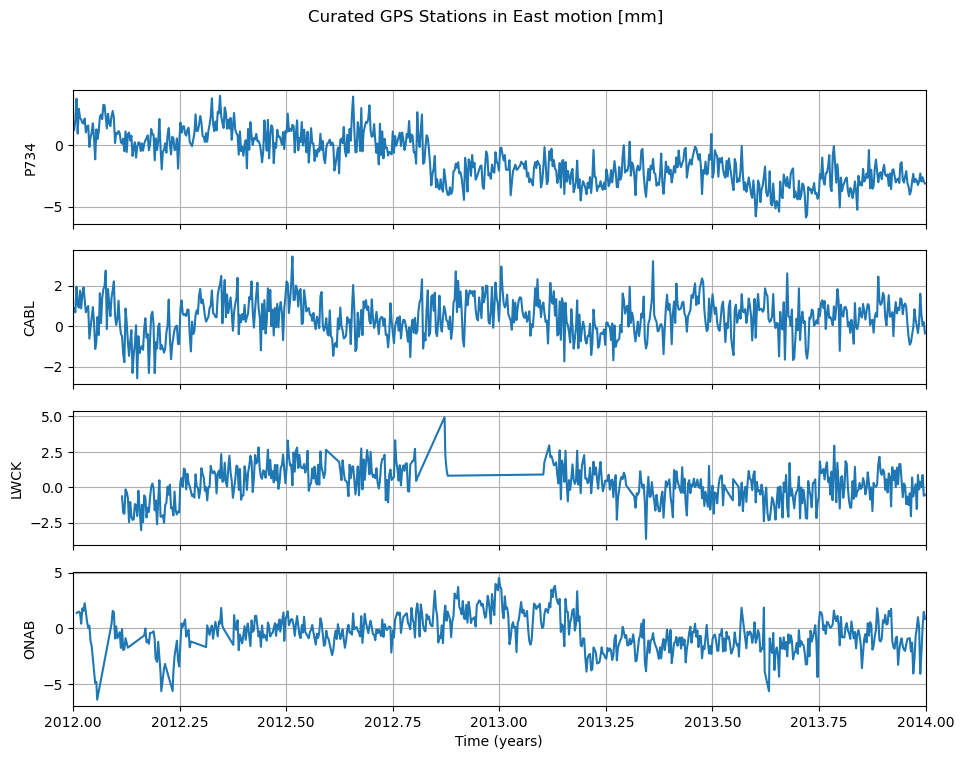

In [44]:
# Plot the graph
fig,ax=plt.subplots(4,1,figsize=(11,8),sharex=True)
fig.suptitle('Curated GPS Stations in East motion [mm]')
ax[0].plot(P734_e_filtered['T'],P734_e_filtered['RESIDUALS']);ax[0].grid(True);ax[0].set_ylabel('P734')
ax[1].plot(CABL_e_filtered['T'],CABL_e_filtered['RESIDUALS']);ax[1].grid(True);ax[1].set_ylabel('CABL')
ax[2].plot(LWCK_e_filtered['T'],LWCK_e_filtered['RESIDUALS']);ax[2].grid(True);ax[2].set_ylabel('LWCK')
ax[3].plot(ONAB_e_filtered['T'],ONAB_e_filtered['RESIDUALS']);ax[3].grid(True);ax[3].set_ylabel('ONAB')
ax[3].set_xlabel('Time (years)')
# Set X-axis limit from 2012 to 2014
for a in ax:
    a.set_xlim(2012, 2014)
plt.show()

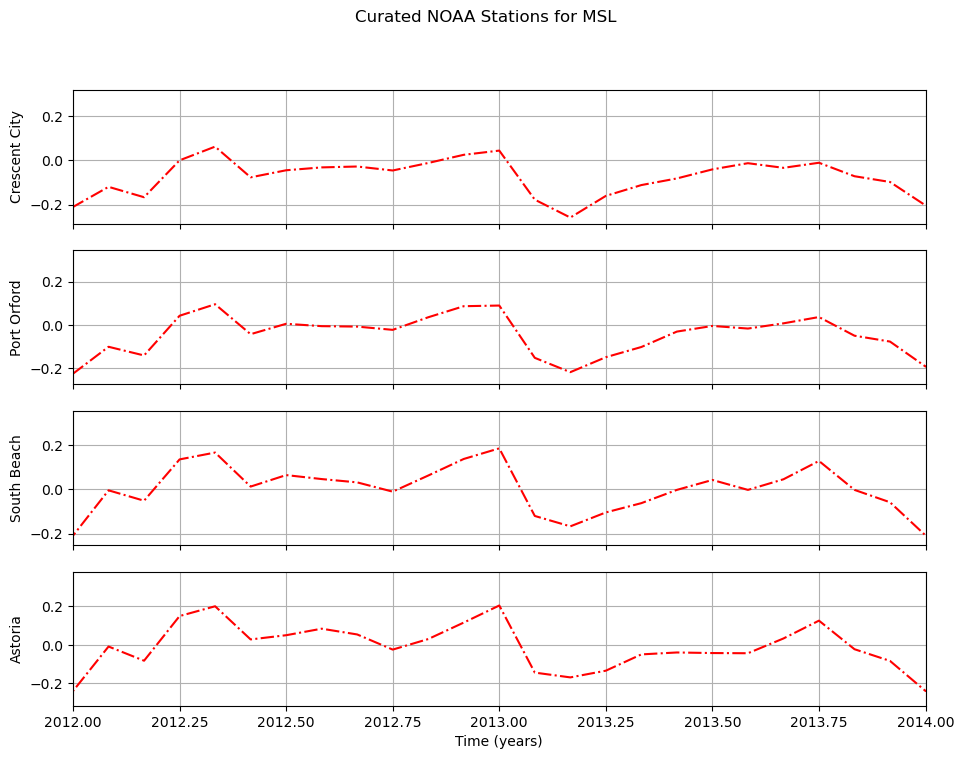

In [66]:
# Plot the graph
fig,ax=plt.subplots(4,1,figsize=(11,8),sharex=True)
fig.suptitle('Curated NOAA Stations for MSL')
ax[0].plot(Crescent_City_msl_filtered['Time'],Crescent_City_msl_filtered[' Monthly_MSL'], '-.r');ax[0].grid(True);ax[0].set_ylabel('Crescent City')
ax[1].plot(Port_Orford_msl_filtered['Time'],Port_Orford_msl_filtered[' Monthly_MSL'], '-.r');ax[1].grid(True);ax[1].set_ylabel('Port Orford')
ax[2].plot(South_Beach_msl_filtered['Time'],South_Beach_msl_filtered[' Monthly_MSL'], '-.r');ax[2].grid(True);ax[2].set_ylabel('South Beach')
ax[3].plot(Astoria_msl_filtered['Time'],Astoria_msl_filtered[' Monthly_MSL'], '-.r');ax[3].grid(True);ax[3].set_ylabel('Astoria')
ax[3].set_xlabel('Time (years)')
# Set X-axis limit from 2012 to 2014
for a in ax:
    a.set_xlim(2012, 2014)
plt.show()

## GPS and NOAA stations

In [24]:
GPS = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_station.csv')
NOAA = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_station.csv')

In [25]:
GPS

,Station,Lat,Long
0,P734,42.07664,-124.29326
1,CHZZ,45.48652,-123.97812
2,IWAC,46.30588,-124.03943
3,P816,47.93711,-124.55708
4,CABL,42.83610,-124.56334
5,FTS1,46.20489,-123.95609
6,PABH,47.21280,-124.20458
7,NEAH,48.29786,-124.6249
8,ONAB,44.51452,-124.07451
9,LWCK,46.27813,-124.05384


In [32]:
GPS_curated = GPS.loc[(GPS.Station == 'P734') | (GPS.Station == 'CABL') | (GPS.Station == 'ONAB') | (GPS.Station == 'LWCK') ]

In [33]:
GPS_curated

,Station,Lat,Long
0,P734,42.07664,-124.29326
4,CABL,42.83610,-124.56334
8,ONAB,44.51452,-124.07451
9,LWCK,46.27813,-124.05384


In [ ]:
NOAA

In [12]:
fig = px.scatter_geo(NOAA,
                     lat='Lat',lon='Long', 
                     height=600, width=600,
                     hover_name='Name',
                     hover_data=['State','ID']);
fig.update_geos(resolution=110, showcountries=True,showland=True,showcoastlines=True,
               lonaxis=dict(range=[-130, -115], gridwidth=1, dtick=2, showgrid=True),
               lataxis=dict(range=[32, 50], gridwidth=1, dtick=2, showgrid=True))

In [ ]:
from itertools import chain

def draw_map (m, scale=0.2):
    #draw a shaded-relief image
    m.shadedrelief(scale=scale)

    #lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    #keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    #cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='black')

/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_51850/380152447.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_51850/380152447.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



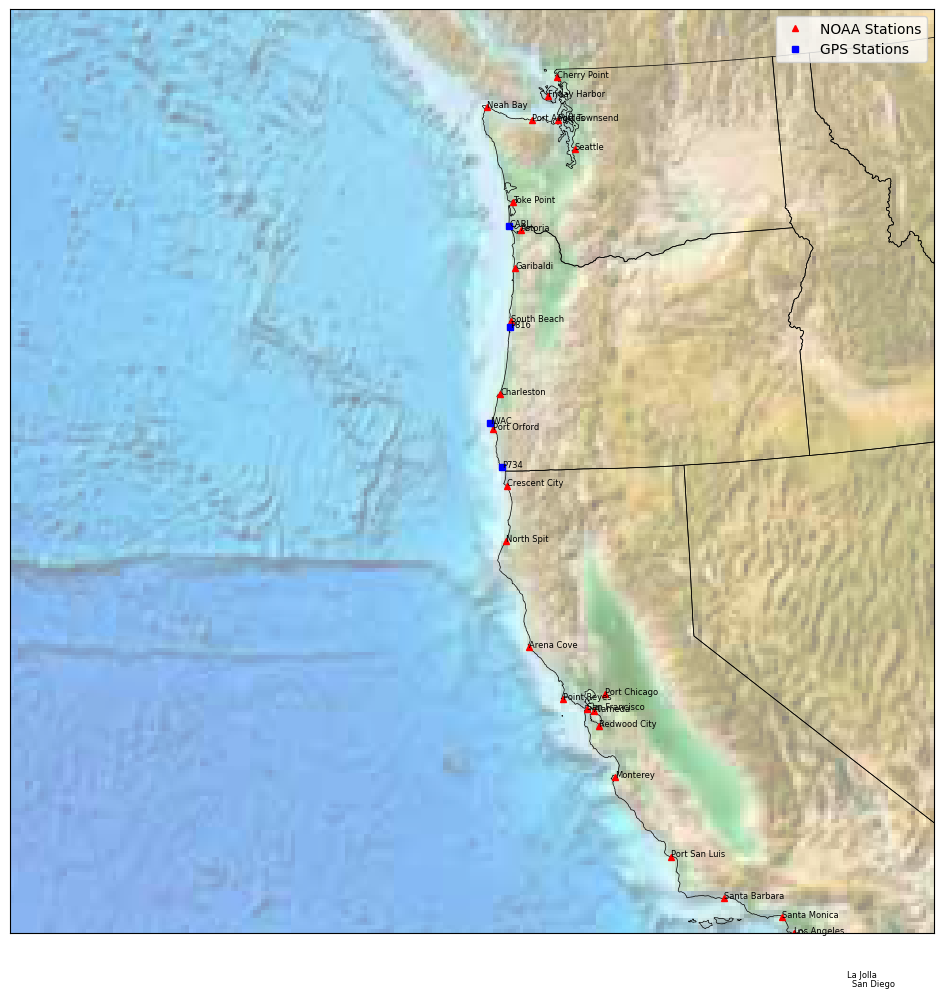

In [34]:
# Clean 'Long' column in NOAA and GPS dataset
NOAA['Long'] = NOAA['Long'].replace('\u200b\u200b', '', regex=True)
NOAA['Long'] = pd.to_numeric(NOAA['Long'], errors='coerce')

GPS['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')

GPS_curated['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS_curated['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')


# Drop rows with NaN values in Long or Lat
NOAA = NOAA.dropna(subset=['Long', 'Lat']) 
GPS = GPS.dropna(subset=['Long', 'Lat'])
GPS_curated = GPS_curated.dropna(subset=['Long', 'Lat'])

# Extract latitude and longitude
Lat_NOAA = NOAA['Lat']
Long_NOAA = NOAA['Long']
Lat_GPS = GPS['Lat']
Long_GPS = GPS['Long']
Lat_GPS_curated = GPS_curated['Lat']
Long_GPS_curated = GPS_curated['Long']
Name_NOAA = NOAA['Name']
Name_GPS = GPS['Station']
Name_GPS_curated = GPS_curated['Station']

fig = plt.figure(figsize = (12, 12))
m = Basemap(projection= 'lcc', resolution = None, 
            width = 1.8E6, height = 1.8E6,
            lat_0 = 42, lon_0 = -125)

#draw_map(m)

# Specify the correct path to the shapefile (replace 'path_to_directory' with the correct path)
shapefile_path = '/Users/suphakornpoobua/Documents/GitHub/Undergraduate-Research-2/'

# Add state boundaries
m.readshapefile(shapefile_path + 'st99_d00', name='states', drawbounds=True)

m.etopo(scale=1, alpha=0.5)

# Map (Long, Lat) to (x, y) for plotting all points at once
X, Y = m(Long_NOAA.values, Lat_NOAA.values)
#A, B = m(Long_GPS.values, Lat_GPS.values)
A, B = m(Long_GPS_curated.values, Lat_GPS_curated.values)

# Plot all points at once
plt.plot(X, Y, '^', markersize=5, color='red', label='NOAA Stations')
plt.plot(A, B, 's', markersize=5, color='blue', label='GPS Stations')

# Add text labels for each point
for x, y, name1 in zip(X, Y, Name_NOAA):
    plt.text(x, y, name1, fontsize=6)

# Add text labels for each point
for a, b, name2 in zip(A, B, Name_GPS):
    plt.text(a, b, name2, fontsize=6)   

plt.legend()
plt.show()